<a href="https://colab.research.google.com/github/de-pesh/ML/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

In [2]:
# Load Dataset (MNIST)
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Use a subset for faster training
x_train = x_train[:10000]
x_test = x_test[:1000]

In [4]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Add a channel dimension (to make it compatible with Conv2D)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

input_shape = (28, 28, 1)

In [6]:
# Create the Convolutional Autoencoder Architecture

# Encoder
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [7]:
# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
# Autoencoder Model
autoencoder = Model(input_img, decoded)

In [9]:
# Compile the Model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
# Train the Autoencoder
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 0.5714 - val_loss: 0.1802
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.1594 - val_loss: 0.1317
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.1236 - val_loss: 0.1146
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.1079 - val_loss: 0.1041
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0998 - val_loss: 0.0985
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0950 - val_loss: 0.0944
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0919 - val_loss: 0.0917
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0890 - val_loss: 0.0899
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - loss: 0.0873 - val_loss: 0.0878
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0854 - val_loss: 0.0864
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0838 - val_loss: 0.0852
Epoch 12/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss

In [11]:
# Use the Autoencoder for Reconstruction
x_test_reconstructed = autoencoder.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [12]:
# Calculate Reconstruction Error (Mean Squared Error)
reconstruction_error = np.mean(np.abs(x_test - x_test_reconstructed), axis=(1, 2, 3))

In [13]:
# Define a threshold for anomaly detection (mean + 2 standard deviations)
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)

In [14]:
# Identify Anomalies
anomalies = reconstruction_error > threshold

In [15]:
# Function to visualize the Results
def plot_anomalies(test_images, reconstructed_images, errors, anomaly_labels, threshold, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
        if errors[i] > threshold:
            plt.title("Anomaly")
        plt.axis("off")

        # Reconstructed image
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

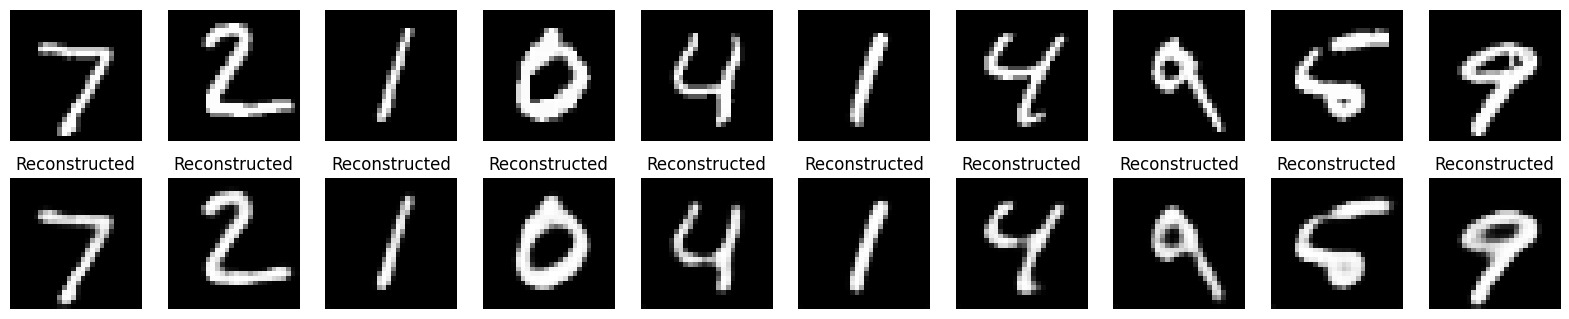

In [16]:
# View 10 test images and their reconstructions
plot_anomalies(x_test, x_test_reconstructed, reconstruction_error, anomalies, threshold)